In [1]:
!pip install schemdraw
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
import schemdraw
import schemdraw.elements as elm
from schemdraw import logic
from ipywidgets import widgets, HBox, interact, Layout
from IPython.display import display, clear_output

### FlipFlop
ref: https://schemdraw.readthedocs.io/en/latest/gallery/logicgate.html#s-r-latch-gates

In [3]:
q = 0
qb = 1
print('initial state Q = 0')
@interact(R=[0,1], S=[0,1])
def flipflop(R,S):
    global q, qb 
    display(HBox(layout=Layout(padding='35px')))

    if S == 1 and R == 0:
        q = 1
        qb = 0
    elif S == 0 and R == 1:
        q = 0
        qb = 1
    elif S == 1 and R == 1:
        q = '???'
        qb = '???'
    
    d = schemdraw.Drawing()
    
    d += logic.Line().length(d.unit/4).label('R', 'left').color('red' if R == 1 else 'black')
    d += (G1 := logic.Nor().anchor('in1'))
    d += logic.Line().length(d.unit/4).color('red' if R == 1 else 'black')
    d += (Q := logic.Dot().color('red' if R == 1 else 'black'))
    d += logic.Line().length(d.unit/4).label('Q='+str(q), 'right').color('red' if R == 1 else 'black')
    d += (G2 := logic.Nor().at((G1.in1[0],G1.in1[1]-2.5)).anchor('in1'))
    d += logic.Line().length(d.unit/4).color('red' if S == 1 else 'black')
    d += (Qb := logic.Dot().color('red' if S == 1 else 'black'))
    d += logic.Line().length(d.unit/4).label('$\overline{Q}=$'+str(qb), 'right').color('red' if S == 1 else 'black')
    d += (S1 := logic.Line().up().at(G2.in1).length(d.unit/6)).color('red' if R == 1 else 'black')
    d += logic.Line().down().at(Q.start).length(d.unit/6).color('red' if R == 1 else 'black')
    d += logic.Line().to(S1.end).color('red' if R == 1 else 'black')
    d += (R1 := logic.Line().down().at(G1.in2).length(d.unit/6).color('red' if S == 1 else 'black'))
    d += logic.Line().up().at(Qb.start).length(d.unit/6).color('red' if S == 1 else 'black')
    d += logic.Line().to(R1.end).color('red' if S == 1 else 'black')
    d += logic.Line().left().at(G2.in2).length(d.unit/4).label('S', 'left').color('red' if S == 1 else 'black')
    
    display(d)

initial state Q = 0


interactive(children=(Dropdown(description='R', options=(0, 1), value=0), Dropdown(description='S', options=(0…

From here, these are temporal notes (Anyone can delete them)

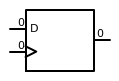

In [4]:
JK = elm.Ic(pins=[elm.IcPin(name='>', pin='0', side='left'),
                  elm.IcPin(name='D', pin='0', side='left'),
                    elm.IcPin(name='', pin='0', side='right', anchorname='QBAR')],
            )
d = schemdraw.Drawing()
d += JK
display(d)

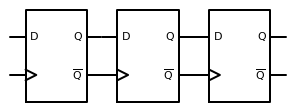

In [5]:
d = schemdraw.Drawing()
d += (F1 := elm.intcircuits.DFlipFlop().anchor('Q'))
d += logic.Line().length(d.unit).color('white')
d += (F2 := elm.intcircuits.DFlipFlop().anchor('Q'))
d += (F3 := elm.intcircuits.DFlipFlop().anchor('D'))
display(d)